FINAL DRAFT OF THIS 
Inputs: cdom files 
outputs: wavelenths.csv, plot.png, outputs.csv
    
    the only cells that need edits are at the top 
    they are labled "with edit here"
    
    Hanna Bridgham 
    6/6/2022


In [1]:
import pandas as pd #the csv reading library
import matplotlib.pyplot as plt #the ploting library
import glob #to get file names
import scipy.optimize
from scipy.optimize import curve_fit
from scipy import interpolate
from scipy.interpolate import pchip_interpolate
import numpy as np
import math
from pandas import Series
from lmfit import Model, Parameter, report_fit
import scipy.ndimage
from scipy.ndimage import gaussian_filter1d
from scipy.signal import savgol_filter
from numpy import ones,vstack
from numpy.linalg import lstsq


WC_ABS_GoM21Su_ID2122 - is fucked up 

!STOPED ON PW_ID2123!


In [2]:
#EDIT HERE
####################################
# This returns a list of names (strings) of files that have the .txt extension. 
# You should provide the path
files = glob.glob('../../../CDOM_DATA/GOM21SU/WC_Abs_GoM21Su_ID2130/*.txt')
# You should add the path of your outputs 
path_1 = '../../../Data_Thesis/CDOM/SPECTRA/WC_ABS_GOM21SU_ID2130_Pchip_wavelenths.csv'
path_2 = "../../../Data_Thesis/CDOM/GRAPHS/WC_ABS_GOM21SU_ID2130_plot.png"
path_3 = '../../../Data_Thesis/CDOM/OUTPUTS/WC_ABS_GOM21SU_ID2130_outputs.csv'
files

['../../../CDOM_DATA/GOM21SU/WC_Abs_GoM21Su_ID2130\\NaClBlank_post_Absorbance_20-10-23-126.txt',
 '../../../CDOM_DATA/GOM21SU/WC_Abs_GoM21Su_ID2130\\NaClBlank_pre_Absorbance_19-41-15-797.txt',
 '../../../CDOM_DATA/GOM21SU/WC_Abs_GoM21Su_ID2130\\WC_Abs_GoM21Su_ID213031_Absorbance_19-44-15-318.txt',
 '../../../CDOM_DATA/GOM21SU/WC_Abs_GoM21Su_ID2130\\WC_Abs_GoM21Su_ID213032_Absorbance_19-45-48-068.txt',
 '../../../CDOM_DATA/GOM21SU/WC_Abs_GoM21Su_ID2130\\WC_Abs_GoM21Su_ID213033_Absorbance_19-47-31-290.txt',
 '../../../CDOM_DATA/GOM21SU/WC_Abs_GoM21Su_ID2130\\WC_Abs_GoM21Su_ID213034_Absorbance_19-49-51-910.txt',
 '../../../CDOM_DATA/GOM21SU/WC_Abs_GoM21Su_ID2130\\WC_Abs_GoM21Su_ID213035_Absorbance_19-51-59-068.txt',
 '../../../CDOM_DATA/GOM21SU/WC_Abs_GoM21Su_ID2130\\WC_Abs_GoM21Su_ID213036_Absorbance_19-59-42-817.txt',
 '../../../CDOM_DATA/GOM21SU/WC_Abs_GoM21Su_ID2130\\WC_Abs_GoM21Su_ID213037_Absorbance_20-01-45-505.txt',
 '../../../CDOM_DATA/GOM21SU/WC_Abs_GoM21Su_ID2130\\WC_Abs_GoM21S

In [3]:
#EDIT HERE
####################################
#first Identify what wavegide was used then uncomment the correct waveguide 
#WG 50 #1 : 190987 : 48.9
#WG 50 #2 : 190991 : 48.75
#WG 50 #3 : 192856 : 48.8 

#WG 10 CM 182380 

#X = .0489 # 50 cm lwcc number 1 SN: , Basiclly antything from GOM21SU thats not PW
#X = .04875 # 50 cm lwcc number 2 SN: , Basiclly antything from GOM21FA thats not PW
#X = .488 # 50 cm lwcc number 3 SN: , Basiclly antything from GOM22SP thats not PW

#X = .001

X = .01


PART 1: GRAPHS AND WAVELENGTHS 

we use pchip to process the data to get the wavelenths in whole numbers 

we will save this to a output tabel 

we will also save the baseline correction 

In [4]:
#FINAL FUNTION 
#see above for the breakdown of diff parts 
def GET_CDOM_DATA(name):
    df = pd.read_csv(name, skiprows=14, sep='\t', names=['wl', 'abs'], )
    df['abs'] = df['abs']*(2.303/X)
    #bcorr = df[(df['wl']>=700) & (df['wl']<=701)]['abs'].mean() # a float corection with just 700 nm 
    #bcorr = df[(df['wl']>=700) & (df['wl']<=750)]['abs'].mean() # a float corection with 700 to 750 nm 
    #df['abs'] = df['abs'] - bcorr
    x = df['wl']
    y = df['abs'] 
    pchip_obj1 = scipy.interpolate.PchipInterpolator(x, y, axis=0, extrapolate=None)
    #xi = np.arange(189,523,1)
    xi = np.arange(189,881,1)
    yi = pchip_obj1(xi)
    d = {'wl': xi, 'abs': yi}
    df = pd.DataFrame(d)
    return df

In [5]:
#EDIT HERE
n = 6 # how many underscore breaks 
stri = 3 # the selected underscore break 
split = 1 #spit in the file name string 

####################################
#MAKE IT ALL IN ONE EASY TO USE DATA FRAME 
#this makes a new data frame there all the columns are the scanns and the rows are the wavelths 
#edit the slpit function to get the abs names 
frames = []
for f in files:
    df = GET_CDOM_DATA(f) # runs the processing function 
    ID = f.split("\\")[split] #takes junk out of the file name to make a single ID 
    df = df.rename(columns={'abs': ID}) # renames the abs col to the new id 
    df = df.set_index('wl', drop=True) # makes the wl the new index, aka the rows 
    frames.append(df) # adds the new col from each scan to a part of frames 
df = pd.concat(frames, axis=1, ignore_index=False) # adds all the things in the frame together to make a new df 
df

,NaClBlank_post_Absorbance_20-10-23-126.txt,NaClBlank_pre_Absorbance_19-41-15-797.txt,WC_Abs_GoM21Su_ID213031_Absorbance_19-44-15-318.txt,WC_Abs_GoM21Su_ID213032_Absorbance_19-45-48-068.txt,WC_Abs_GoM21Su_ID213033_Absorbance_19-47-31-290.txt,WC_Abs_GoM21Su_ID213034_Absorbance_19-49-51-910.txt,WC_Abs_GoM21Su_ID213035_Absorbance_19-51-59-068.txt,WC_Abs_GoM21Su_ID213036_Absorbance_19-59-42-817.txt,WC_Abs_GoM21Su_ID213037_Absorbance_20-01-45-505.txt,WC_Abs_GoM21Su_ID213038_Absorbance_20-03-36-206.txt,WC_Abs_GoM21Su_ID213039_Absorbance_20-05-41-867.txt,WC_Abs_GoM21Su_ID213040_Absorbance_20-07-25-106.txt
wl,,,,,,,,,,,,
189,-17.871280,-29.800820,-45.760610,-58.242870,-68.606370,-74.502050,-79.798950,-5.227810,-9.304120,-9.580480,-15.314950,-13.011950
190,-17.871280,-29.800820,-45.760610,-58.242870,-68.606370,-74.502050,-79.798950,-5.227810,-9.304120,-9.580480,-15.314950,-13.011950
191,-18.351148,-28.971740,-43.929725,-51.840530,-60.568900,-67.086390,-75.285070,-4.790240,-7.312025,-10.329197,-12.528320,-15.130710
192,-17.700650,-24.442125,-42.280984,-50.525575,-57.359665,-67.851527,-72.781185,-4.346848,-6.938035,-7.209918,-11.426294,-11.552511
193,-16.742160,-20.823133,-42.472933,-49.063892,-56.332034,-67.456756,-66.547958,-3.862539,-5.383393,-11.975245,-14.160410,-13.973421
...,...,...,...,...,...,...,...,...,...,...,...,...
876,36.885982,0.297193,20.560481,35.090498,54.725673,78.190333,105.913297,-66.053273,-48.893460,-30.356914,-11.148726,11.542285
877,10.510485,-2.696614,26.464499,47.221089,68.377204,113.471407,124.294445,-35.298899,-3.926696,-9.762794,104.997961,6.383720
878,0.000000,14.877795,46.375156,72.510858,88.665066,132.000979,266.388889,-79.717800,33.447436,25.318892,211.510745,0.000000


In [6]:
#HERE WE ARE GOING TO AVERAGE THE SCANNS TO GET A VALUE FOR EACH WAVELENTH
#this filters eveything by all that have the work 'Absorbance' with anything after it 
#and turns it into a new object 
d = df.filter(regex='Absorbance*', axis=1)
#this splits the column names by 
#edit here to make the names a 6 diget number code
#names = d.columns.str.rsplit('_', n=5).str[3]
names = d.columns.str.rsplit('ID', n=2).str[1]
names = names.str.rsplit('_', n=4).str[0]
#this part groups evethign by the sample ID that we have in names then avarages all scanns regardless of how many there are 
df = d.groupby(names, axis=1).mean()
df

,213031,213032,213033,213034,213035,213036,213037,213038,213039,213040
wl,,,,,,,,,,
189,-45.760610,-58.242870,-68.606370,-74.502050,-79.798950,-5.227810,-9.304120,-9.580480,-15.314950,-13.011950
190,-45.760610,-58.242870,-68.606370,-74.502050,-79.798950,-5.227810,-9.304120,-9.580480,-15.314950,-13.011950
191,-43.929725,-51.840530,-60.568900,-67.086390,-75.285070,-4.790240,-7.312025,-10.329197,-12.528320,-15.130710
192,-42.280984,-50.525575,-57.359665,-67.851527,-72.781185,-4.346848,-6.938035,-7.209918,-11.426294,-11.552511
193,-42.472933,-49.063892,-56.332034,-67.456756,-66.547958,-3.862539,-5.383393,-11.975245,-14.160410,-13.973421
...,...,...,...,...,...,...,...,...,...,...
876,20.560481,35.090498,54.725673,78.190333,105.913297,-66.053273,-48.893460,-30.356914,-11.148726,11.542285
877,26.464499,47.221089,68.377204,113.471407,124.294445,-35.298899,-3.926696,-9.762794,104.997961,6.383720
878,46.375156,72.510858,88.665066,132.000979,266.388889,-79.717800,33.447436,25.318892,211.510745,0.000000


In [7]:
#HERE WE DO THE BASLINE CORRECTION AND SAVE THE CORECTION AS 'bcorr'
#bcorr = df[333:334].mean(axis=0) # 333:334 is 521 to 522 nm and this line takes the average 
#df = df[:] - df[333:334].mean(axis=0) # here we correct the data by that average 

bcorr = df[486:537].mean(axis=0) # 486:537 is 675 to 725 nm and this line takes the average 
df = df[:] - df[486:537].mean(axis=0) # here we correct the data by that average 

df

,213031,213032,213033,213034,213035,213036,213037,213038,213039,213040
wl,,,,,,,,,,
189,-31.906308,-44.574399,-54.859753,-61.837479,-66.917422,6.380169,0.299946,0.013273,-6.294551,-4.036689
190,-31.906308,-44.574399,-54.859753,-61.837479,-66.917422,6.380169,0.299946,0.013273,-6.294551,-4.036689
191,-30.075423,-38.172059,-46.822283,-54.421819,-62.403542,6.817739,2.292041,-0.735444,-3.507921,-6.155449
192,-28.426682,-36.857104,-43.613048,-55.186956,-59.899657,7.261131,2.666031,2.383835,-2.405895,-2.577250
193,-28.618631,-35.395421,-42.585417,-54.792185,-53.666430,7.745441,4.220673,-2.381492,-5.140011,-4.998160
...,...,...,...,...,...,...,...,...,...,...
876,34.414783,48.758969,68.472290,90.854904,118.794825,-54.445293,-39.289393,-20.763161,-2.128326,20.517547
877,40.318801,60.889560,82.123821,126.135978,137.175973,-23.690920,5.677371,-0.169041,114.018361,15.358981
878,60.229458,86.179329,102.411683,144.665550,279.270417,-68.109820,43.051502,34.912645,220.531144,8.975261


In [8]:
#HERE WE MAKE A COPY OF THE DATA THAT IS VERTICAL SO JB LIKES IT
Abs_data = df.transpose(copy=False)
Abs_data['bcorr'] = bcorr
Abs_data

#save it as a CSV to the propor location with the correct file name
Abs_data.to_csv(path_1)

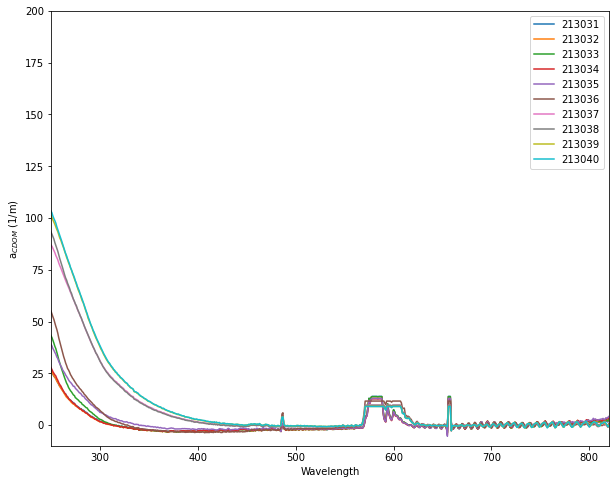

In [9]:
#HERE, WE MAKE A QUICK AND DIRTY GRAPH OF THE DATA TO SAVE AND CHECK WORK 
fig, ax = plt.subplots(figsize=(10,8))
df.plot(label='', ax=ax)
ax.set_ylim(-10,200)
ax.set_xlim(250,820)
ax.set_xlabel("Wavelength")
ax.set_ylabel("a$_{CDOM}$ (1/m)")
#ax.set_title("BC_ABS_BLU22_2226_GB")

plt.savefig(path_2)

PART 2: REGRESSIONS

I need an output table for each sampling event with the sample number

we will get this with 2 regression methods 

there are two ways we are going to calculate the spectral slopes 
1. Single exponential (SEM) where: $A(g)=Ae^{slope}$
2. Hyperbolic (HM) where: $A(g)=A(\frac{wl}{532})^{slope}$

corresponding parameters = abs 254, abs 280, abs 320, abs 412, abs 444 

corresponding parameters = the spectral slope of 275 to 295, the spectral slope of 350 to 400, the spectral slope of 275 to 700

corresponding parameters = spectral ratio of spectral slope of 275 to 295 and the spectral slope of 350 to 400

corresponding parameters = baseline correction we used, so the b term 


In [10]:
#OPEN OUR FILES AND MAKE ABSORBANCE TO ABSORPTION
def open_file_abs_base_cor(name):
    df = pd.read_csv(name, skiprows=14, sep='\t', names=['wl', 'abs'], )
    df['abs'] = df['abs']*(2.303/X)
    return df

In [11]:
#MAKE IT ALL IN ONE EASY TO USE DATA FRAME 
#this makes a new data frame there all the columns are the scanns and the rows are the wavelths 
frames = []
for f in files:
    df = open_file_abs_base_cor(f) # runs the processing function 
    ID = f.split("\\")[split] #takes junk out of the file name to make a single ID 
    df = df.rename(columns={'abs': ID}) # renames the abs col to the new id 
    df = df.set_index('wl', drop=True) # makes the wl the new index, aka the rows 
    frames.append(df) # adds the new col from each scan to a part of frames 
df = pd.concat(frames, axis=1, ignore_index=False) # adds all the things in the frame together to make a new df 

#HERE WE ARE GOING TO AVERAGE THE SCANNS TO GET A VALUE FOR EACH WAVELENTH 
d = df.filter(regex='Absorbance*', axis=1)
#this splits the column names by 
names = d.columns.str.rsplit('ID', n=2).str[1]
names = names.str.rsplit('_', n=4).str[0]
#names = d.columns.str.rsplit('_', n=5).str[3]
#this part groups evethign by the sample ID that we have in names then avarages all scanns regardless of how many there are 
df = df.groupby(names, axis=1).mean()
df['wl'] = df.index
df

,213031,213032,213033,213034,213035,213036,213037,213038,213039,213040,wl
wl,,,,,,,,,,,
189.662,-45.76061,-58.24287,-68.60637,-74.50205,-79.79895,-5.22781,-9.30412,-9.58048,-15.31495,-13.01195,189.662
190.044,-45.76061,-58.24287,-68.60637,-74.50205,-79.79895,-5.22781,-9.30412,-9.58048,-15.31495,-13.01195,190.044
190.426,-56.65380,-64.55309,-65.49732,-78.30200,-81.45711,-4.51388,-6.42537,-10.91622,-12.75862,-12.06772,190.426
190.809,-42.02975,-49.49147,-60.08527,-66.25731,-71.18573,-6.79385,-7.66899,-10.57077,-13.56467,-16.00585,190.809
191.191,-45.82970,-54.18959,-61.05253,-67.91547,-79.38441,-2.78663,-6.95506,-10.17926,-11.49197,-14.25557,191.191
...,...,...,...,...,...,...,...,...,...,...,...
880.598,67.57002,123.11838,154.89978,0.00000,0.00000,138.11091,68.33001,-20.19731,-38.36798,-39.93402,880.598
880.888,65.81974,101.35503,158.79185,0.00000,0.00000,56.42350,50.57388,-28.41902,-28.74144,-51.31084,880.888
881.179,76.29839,141.33511,194.23502,0.00000,0.00000,36.54861,7.80717,-24.84937,-61.69737,-70.03423,881.179


In [12]:
#EXPONENTAL REGRESSION A(g)=Ae^slope
def exp_equation(x, a, s, b):
    return a * np.exp(-s * x) + b

In [13]:
#HERE DO THE WHOLE EXPO AS A LOOP FOR ALL SAMPLES 
Frames = []
maxfev = 10000000
for (columnName, columnData) in df.iteritems():
    col = columnName
    #get the x and y values for all the slope intervals we want 
    ydata_s700 = df[(df['wl']>=275) & (df['wl']<=700)][col]
    xdata_s700 = df[(df['wl']>=275) & (df['wl']<=700)]['wl']
    ydata_s700 = np.asarray(ydata_s700, dtype=float).ravel()
    xdata_s700 = np.asarray(xdata_s700, dtype=float).ravel()
    ydata_s295 = df[(df['wl']>=275) & (df['wl']<=295)][col]
    xdata_s295 = df[(df['wl']>=275) & (df['wl']<=295)]['wl']
    ydata_s295 = np.asarray(ydata_s295, dtype=float).ravel()
    xdata_s295 = np.asarray(xdata_s295, dtype=float).ravel()
    ydata_s350 = df[(df['wl']>=350) & (df['wl']<=400)][col]
    xdata_s350 = df[(df['wl']>=350) & (df['wl']<=400)]['wl']
    ydata_s350 = np.asarray(ydata_s350, dtype=float).ravel()
    xdata_s350 = np.asarray(xdata_s350, dtype=float).ravel()
    
    #set some innital guesses to the curve fit 
    pams_700 = (15, .001, 0)
    pams_295 = (10, .001, 0)
    pams_350 = (10, .001, 0)
    
    #regression exp_equation 275 to 700
    params, cv = curve_fit(exp_equation, xdata_s700, ydata_s700, p0=pams_700, maxfev=maxfev)
    a, s, b = params
    
    #get the valuse for exp_equation 275 to 700 and calcuate rSquared
    squaredDiffs = np.square(ydata_s700 - exp_equation(xdata_s700, a, s, b))
    squaredDiffsFromMean = np.square(ydata_s700 - np.mean(ydata_s700))
    rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
    R2_275_700 = rSquared
    ss_275_700 = s
    
    #get the waveleths we need
    abs_254 = exp_equation(252, a, s, b)
    abs_280 = exp_equation(280, a, s, b)
    abs_320 = exp_equation(320, a, s, b)
    abs_350 = exp_equation(350, a, s, b)
    abs_412 = exp_equation(412, a, s, b)
    abs_440 = exp_equation(440, a, s, b)
    
    #regression exp_equation 275 to 295
    params, cv = curve_fit(exp_equation, xdata_s295, ydata_s295, p0=pams_295, maxfev=maxfev)
    a, s, b = params
    
    #get the valuse for exp_equation 270 to 295 and calcuate rSquared
    squaredDiffs = np.square(ydata_s295 - exp_equation(xdata_s295, a, s, b))
    squaredDiffsFromMean = np.square(ydata_s295 - np.mean(ydata_s295))
    rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
    R2_275_295 = rSquared
    ss_275_295 = s
    
    #regression exp_equation 350 to 400
    params, cv = curve_fit(exp_equation, xdata_s350, ydata_s350, p0=pams_350, maxfev=maxfev)
    a, s, b = params
    
    #get the valuse for exp_equation 350 to 400 and calcuate rSquared
    squaredDiffs = np.square(ydata_s350 - exp_equation(xdata_s350, a, s, b))
    squaredDiffsFromMean = np.square(ydata_s350 - np.mean(ydata_s350))
    rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
    R2_350_400 = rSquared
    ss_350_400 = s 
    
    #get the spectral ratio 
    sr = ss_275_295 / ss_350_400
    
    dict = {'sample':[columnName],
        'ss_275_700_SEM':[ss_275_700],
        'ss_275_295_SEM':[ss_275_295],
        'ss_350_400_SEM':[ss_350_400],
        'R2_275_700':[R2_275_700],
        'R2_275_295':[R2_275_295],
        'R2_350_400':[R2_350_400],
        'SR_SEM':[sr],
        'abs_254_SEM':[abs_254], 
        'abs_280_SEM':[abs_280],
        'abs_320_SEM':[abs_320], 
        'abs_350_SEM':[abs_350],
        'abs_412_SEM':[abs_412], 
        'abs_440_SEM':[abs_440]}
    ss_outs = pd.DataFrame(dict)
    ss_outs = ss_outs.set_index('sample', drop=True)
    Frames.append(ss_outs)

ss_outs = pd.concat(Frames, axis=0, ignore_index=False) # adds all the things in the frame together to make a new df 
ss_outs = ss_outs.drop('wl')

In [14]:
#HERE WE TEST TO MAKE SURE THE R SQAURED IS GOOD 
#this will let us know if something is wrong and where 

ss_outs = pd.concat(Frames, axis=0, ignore_index=False) # adds all the things in the frame together to make a new df 
ss_outs = ss_outs.drop('wl')

R_level = .95 #set x to the r2 value you want to test

min_1 = ss_outs['R2_275_700'].min()
min_2 = ss_outs['R2_275_295'].min()
min_3 = ss_outs['R2_350_400'].min()

if min_1 < R_level: 
    print("!!! WARNING !!! 275_700 has a bad R2 !!!")
if min_2 < R_level:
    print("!!! WARNING !!! 275_295 has a bad R2 !!!")
if min_3 < R_level:
    print("!!! WARNING !!! 350_400 has a bad R2 !!!")
else: 
    print("THE FITS ARE GOOD, YAY!")
    
ss_outs.loc[ss_outs.R2_275_700 < R_level, 'ss_275_700_SEM'] = np.nan
ss_outs.loc[ss_outs.R2_275_295 < R_level, 'ss_275_295_SEM'] = np.nan
ss_outs.loc[ss_outs.R2_350_400 < R_level, 'ss_350_400_SEM'] = np.nan
    
#HERE WE SAME THE SLOPE VALUES 
ss_275_700_SEM = ss_outs['ss_275_700_SEM']
ss_275_295_SEM = ss_outs['ss_275_295_SEM']
ss_350_400_SEM = ss_outs['ss_350_400_SEM']
abs_254_SEM = ss_outs['abs_254_SEM']
abs_280_SEM = ss_outs['abs_280_SEM']
abs_320_SEM = ss_outs['abs_320_SEM']
abs_412_SEM = ss_outs['abs_412_SEM']
abs_440_SEM = ss_outs['abs_440_SEM']
SR_SEM = ss_outs['SR_SEM']

!!! WARNING !!! 275_700 has a bad R2 !!!
!!! WARNING !!! 350_400 has a bad R2 !!!


In [15]:
#HYPERBOLIC REGRESSION A(g)=A(wl/532)^slope
def hyp_equation(x, a, s, b):
    return a * ((x/532)**-s) + b

In [16]:
Frames = []
maxfev = 1000000
for (columnName, columnData) in df.iteritems():
    col = columnName
    #get the x and y values for all the slope intervals we want 
    #get the x and y values for all the slope intervals we want 
    ydata_s700 = df[(df['wl']>=275) & (df['wl']<=700)][col]
    xdata_s700 = df[(df['wl']>=275) & (df['wl']<=700)]['wl']
    ydata_s700 = np.asarray(ydata_s700, dtype=float).ravel()
    xdata_s700 = np.asarray(xdata_s700, dtype=float).ravel()
    ydata_s295 = df[(df['wl']>=275) & (df['wl']<=295)][col]
    xdata_s295 = df[(df['wl']>=275) & (df['wl']<=295)]['wl']
    ydata_s295 = np.asarray(ydata_s295, dtype=float).ravel()
    xdata_s295 = np.asarray(xdata_s295, dtype=float).ravel()
    ydata_s350 = df[(df['wl']>=350) & (df['wl']<=400)][col]
    xdata_s350 = df[(df['wl']>=350) & (df['wl']<=400)]['wl']
    ydata_s350 = np.asarray(ydata_s350, dtype=float).ravel()
    xdata_s350 = np.asarray(xdata_s350, dtype=float).ravel()
    
    #set some innital guesses to the curve fit 
    pams_700 = (1, 10, 0)
    pams_295 = (1, 0, 1)
    pams_350 = (1, 1, 1)
    
    maxfev = 1000000
    
    #regression exp_equation 275 to 700
    params, cv = curve_fit(hyp_equation, xdata_s700, ydata_s700, p0=pams_700, maxfev=maxfev)
    a, s, b = params
    
    #print out for exp_equation 275 to 700 and calcuate rSquared
    squaredDiffs = np.square(ydata_s700 - hyp_equation(xdata_s700, a, s, b))
    squaredDiffsFromMean = np.square(ydata_s700 - np.mean(ydata_s700))
    rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
    R2_275_700 = rSquared
    ss_275_700 = s
    
    #get the waveleths we need
    abs_254 = hyp_equation(252, a, s, b)
    abs_280 = hyp_equation(280, a, s, b)
    abs_320 = hyp_equation(320, a, s, b)
    abs_350 = hyp_equation(350, a, s, b)
    abs_412 = hyp_equation(412, a, s, b)
    abs_440 = hyp_equation(440, a, s, b)
    
    #regression exp_equation 275 to 295
    params, cv = curve_fit(hyp_equation, xdata_s295, ydata_s295, p0=pams_295, maxfev=maxfev)
    a, s, b = params
    
    #print out for exp_equation 270 to 295 and calcuate rSquared
    squaredDiffs = np.square(ydata_s295 - hyp_equation(xdata_s295, a, s, b))
    squaredDiffsFromMean = np.square(ydata_s295 - np.mean(ydata_s295))
    rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
    R2_275_295 = rSquared
    ss_275_295 = s
    
    #regression exp_equation 350 to 400
    params, cv = curve_fit(hyp_equation, xdata_s350, ydata_s350, p0=pams_350, maxfev=maxfev)
    a, s, b = params
    
    #print out for exp_equation 350 to 400 and calcuate rSquared
    squaredDiffs = np.square(ydata_s350 - hyp_equation(xdata_s350, a, s, b))
    squaredDiffsFromMean = np.square(ydata_s350 - np.mean(ydata_s350))
    rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
    R2_350_400 = rSquared
    ss_350_400 = s 
    
    #get the spectral ratio 
    sr = ss_275_295 / ss_350_400
    
    dict = {'sample':[columnName],
        'ss_275_700_HM':[ss_275_700],
        'ss_275_295_HM':[ss_275_295],
        'ss_350_400_HM':[ss_350_400],
        'R2_275_700':[R2_275_700],
        'R2_275_295':[R2_275_295],
        'R2_350_400':[R2_350_400],
        'SR_HM':[sr],
        'abs_254_HM':[abs_254], 
        'abs_280_HM':[abs_280],
        'abs_320_HM':[abs_320], 
        'abs_350_HM':[abs_350],
        'abs_412_HM':[abs_412], 
        'abs_440_HM':[abs_440]}
    ss_outs = pd.DataFrame(dict)
    ss_outs = ss_outs.set_index('sample', drop=True)
    Frames.append(ss_outs)

ss_outs = pd.concat(Frames, axis=0, ignore_index=False) # adds all the things in the frame together to make a new df 
ss_outs = ss_outs.drop('wl')

In [17]:
#HERE WE TEST TO MAKE SURE THE R SQAURED IS GOOD 
#this will let us know if something is wrong and where 

ss_outs = pd.concat(Frames, axis=0, ignore_index=False) # adds all the things in the frame together to make a new df 
ss_outs = ss_outs.drop('wl')

R_level = .95 #set x to the r2 value you want to test

min_1 = ss_outs['R2_275_700'].min()
min_2 = ss_outs['R2_275_295'].min()
min_3 = ss_outs['R2_350_400'].min()

if min_1 < R_level: 
    print("!!! WARNING !!! 275_700 has a bad R2 !!!")
if min_2 < R_level:
    print("!!! WARNING !!! 275_295 has a bad R2 !!!")
if min_3 < R_level:
    print("!!! WARNING !!! 350_400 has a bad R2 !!!")
else: 
    print("THE FITS ARE GOOD, YAY!")

ss_outs.loc[ss_outs.R2_275_700 < R_level, 'ss_275_700_HM'] = np.nan
ss_outs.loc[ss_outs.R2_275_295 < R_level, 'ss_275_295_HM'] = np.nan
ss_outs.loc[ss_outs.R2_350_400 < R_level, 'ss_350_400_HM'] = np.nan
    
    
#HERE WE SAME THE SLOPE VALUES 
ss_275_700_HM = ss_outs['ss_275_700_HM']
ss_275_295_HM = ss_outs['ss_275_295_HM']
ss_350_400_HM = ss_outs['ss_350_400_HM']
abs_254_HM = ss_outs['abs_254_HM']
abs_280_HM = ss_outs['abs_280_HM']
abs_320_HM = ss_outs['abs_320_HM']
abs_412_HM = ss_outs['abs_412_HM']
abs_440_HM = ss_outs['abs_440_HM']
SR_HM = ss_outs['SR_HM']

!!! WARNING !!! 275_700 has a bad R2 !!!
!!! WARNING !!! 350_400 has a bad R2 !!!


PART 3: MAKE ESTIMATE OF INFLECTION 

So at a lot of these there is an infection at around 350 nm 

We need a way to estimate that inflection 

we are going to look for inflections between 300 and 400 nm and quantify them 


In [18]:
#EXPONENTAL REGRESSION A(g)=Ae^slope
def exp_equation(x, a, s, b):
    return a * np.exp(-s * x) + b

In [19]:
#HERE WE FIND THE INTIGRAL OF ALL THE SAMPLE FOR 350 INFLECTION 
Frames = []
maxfev = 10000000
for (columnName, columnData) in df.iteritems():
    col = columnName
    #define where we expect to find the inflection 
    ydata = df[(df['wl']>=300) & (df['wl']<=400)][col]
    xdata = df[(df['wl']>=300) & (df['wl']<=400)]['wl']
    ydata = np.asarray(ydata, dtype=float).ravel()
    xdata = np.asarray(xdata, dtype=float).ravel()
    
    #here we take evething not in the infelction for the abs data
    ydata_r1 = df[(df['wl']>=250) & (df['wl']<=300)][col]
    ydata_r2 = df[(df['wl']>=400) & (df['wl']<=700)][col]
    ydata_r = pd.concat([ydata_r1, ydata_r2], axis=0)
    
    #here we take evething not in the infelction for the wl data
    xdata_r1 = df[(df['wl']>=250) & (df['wl']<=300)]['wl']
    xdata_r2 = df[(df['wl']>=400) & (df['wl']<=700)]['wl']
    xdata_r = pd.concat([xdata_r1, xdata_r2], axis=0)
    
    #here we make them both arrays so we can doo math 
    ydata_r = np.asarray(ydata_r, dtype=float).ravel()
    xdata_r = np.asarray(xdata_r, dtype=float).ravel()
    
    #set some innital guesses to the curve fit 
    pams = (1, .001, 0)
    
    #here we do an expodental fit for just the data where we expect there to de no inflection 
    #aka, what the regression would be without the inflection 
    params, cv = curve_fit(exp_equation, xdata_r, ydata_r, p0=pams, maxfev = maxfev)
    a, s, b = params
    
    #here we calculate the R squared of that regressions fit 
    squaredDiffs = np.square(ydata_r - exp_equation(xdata_r, a, s, b))
    squaredDiffsFromMean = np.square(ydata_r - np.mean(ydata_r))
    rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
    
    #here we take the differance of the accual data and the regressions fit that dident have that data 
    diffs = ydata - exp_equation(xdata, a, s, b)
    
    #here we normalize the data 
    diffs = (diffs - np.min(diffs)) / (np.max(diffs) - np.min(diffs))
    
    #here we flaten the data
    y1 = xdata[0]
    y2 = xdata[273]
    x1 = diffs[0]
    x2 = diffs[273]
    m = (x2 - x1)/(y2 - y1)
    mx = m * y1
    b = x1 - mx
    
    diffs = diffs - ((m*xdata)+b)
    
    #here we calculate the intigral 
    inter = scipy.integrate.simps(ydata, x=diffs, even='avg')
    
    #plt.plot(xdata, diffs, 'ko', label='data')
    #plt.plot(xdata, gauss(xdata, *gauss_fit(xdata, diffs)), '--r', label='fit')
    #plt.show()
    #print('The offset of the gaussian baseline is', gaus_baseline)
    #print('The center of the gaussian fit is', center_gaus)
    #print('The sigma of the gaussian fit is', sigma)
    #print('The maximum intensity of the gaussian fit is', H + A)
    #print('The Amplitude of the gaussian fit is', A)
    #print('The FWHM of the gaussian fit is', FWHM)
    
    #here we define some columns for a new data frame with the sample, the R2, and the diffs intigral 
    dict = {'sample':[columnName],
        '350_intergration':[inter],
        'R2':[rSquared]}
    diff = pd.DataFrame(dict)
    
    #here we set the index and append the data together 
    diffs = diff.set_index('sample', drop=True)
    Frames.append(diffs) # adds the new col from each scan to a part of frames 
    
    
diffs = pd.concat(Frames, axis=0, ignore_index=False) # adds all the things in the frame together to make a new df 
diffs = diffs.drop('wl') # drops the wl col 

In [20]:
#HERE WE TEST TO MAKE SURE THE R SQAURED IS GOOD 
#this will let us know if something is wrong and where 

diffs = pd.concat(Frames, axis=0, ignore_index=False) # adds all the things in the frame together to make a new df 
diffs = diffs.drop('wl') # drops the wl col 

R_level = .95 #set x to the r2 value you want to test

min_1 = diffs['R2'].min()

if min_1 < R_level: 
    print("!!! WARNING !!! 275_700 has a bad R2 !!!")
else: 
    print("THE FITS ARE GOOD, YAY!")

diffs.loc[diffs.R2 < R_level, '350_intergration'] = np.nan

!!! WARNING !!! 275_700 has a bad R2 !!!


In [21]:
#NOW WE SAVE ALL THE VALUSE WE WANTED TO A TABEL 
outputs = pd.concat([ss_275_700_SEM, ss_275_295_SEM, ss_350_400_SEM,
                    ss_275_700_HM, ss_275_295_HM, ss_350_400_HM,
                    abs_254_SEM, abs_280_SEM, abs_320_SEM, abs_412_SEM, abs_440_SEM,
                    abs_254_HM, abs_280_HM, abs_320_HM, abs_412_HM, abs_440_HM,
                    SR_SEM, SR_HM], axis=1)
#outputs = outputs.rename(columns={0: 'baseline_correction', 1: 'abs_254',
#                                  2: 'abs_280', 3: 'abs_320', 4: 'abs_412', 5: 'abs_444'})
outputs['350_intergration'] = diffs['350_intergration']
outputs 
#SAVE IT 
outputs.to_csv(path_3)
outputs

,ss_275_700_SEM,ss_275_295_SEM,ss_350_400_SEM,ss_275_700_HM,ss_275_295_HM,ss_350_400_HM,abs_254_SEM,abs_280_SEM,abs_320_SEM,abs_412_SEM,abs_440_SEM,abs_254_HM,abs_280_HM,abs_320_HM,abs_412_HM,abs_440_HM,SR_SEM,SR_HM,350_intergration
sample,,,,,,,,,,,,,,,,,,,
213031,NaN,0.005905,NaN,NaN,-0.010083,NaN,-14.942560,-14.906700,-14.843398,-14.621987,-14.525502,-15.019766,-14.856092,-14.648659,-14.256113,-14.153978,0.048263,6.823112,NaN
213032,NaN,0.006216,NaN,NaN,-0.009759,NaN,-15.247536,-15.098159,-14.884766,-14.393976,-14.244610,-15.127919,-14.935304,-14.691192,-14.229236,-14.109042,0.044908,7.209326,NaN
213033,NaN,0.009076,NaN,NaN,-0.005692,NaN,-14.556889,-14.473164,-14.353560,-14.078480,-13.994762,-14.210704,-14.148749,-14.070229,-13.921638,-13.882977,0.065853,2.599824,NaN
213034,NaN,0.014956,NaN,NaN,-0.003286,NaN,-13.809103,-13.777624,-13.721566,-13.521978,-13.433751,-13.866755,-13.717242,-13.527756,-13.169174,-13.075876,0.105149,2.465055,NaN
213035,NaN,0.007219,NaN,NaN,1.047711,NaN,46.101946,2.725682,-10.708575,-13.085755,-13.108935,58.389016,2.803998,-10.747488,-13.056257,-13.095615,0.120259,-868.776702,NaN
213036,NaN,0.015691,NaN,NaN,3.461682,NaN,78.025555,6.256741,-9.784052,-11.548015,-11.555054,-10.322970,-10.376082,-10.443395,-10.570785,-10.603932,0.382668,-3047.543642,NaN
213037,NaN,0.004789,0.020626,NaN,0.357090,-0.001183,105.775074,43.723025,8.584397,-7.148633,-7.853304,123.530075,44.439310,8.064489,-6.763192,-7.575988,0.232161,-301.895630,-6.078792
213038,NaN,0.005815,0.020851,NaN,0.649204,-0.001238,108.028256,43.960918,8.280803,-7.271998,-7.941615,126.253633,44.662610,7.777960,-6.895092,-7.675739,0.278881,-524.230881,-2.969219
213039,0.026473,0.003821,0.021082,8.191141,0.082708,-0.001049,122.504982,54.277644,13.710876,-5.944202,-6.931490,141.863130,55.158019,13.077730,-5.441301,-6.555041,0.181233,-78.878233,-12.489995
